# Métodos de selección de características
(Métodos de filtro)

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df=pd.read_csv("MODELAJE2.txt",sep="\t")

In [3]:

df = df.fillna(value=0)

In [4]:
df

,CONSULTA,BGI,AA1,AA2,AA3,AA4,AA5,AA6,AA7,AA8,...,AA1779,AA1780,AA1781,AA1782,AA1783,AA1784,AA1785,AA1786,AA1787,AA1788
0,AZ322840,0,1,0.113636,1,0.113636,1,0.204545,1,0.409091,...,162.0,3426.0,571.000000,2412.0,1014.0,169.000000,1014.0,2388.0,597.0,1014.0
1,AZ462661,0,1,0.290323,1,0.290323,1,0.580645,1,0.580645,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,36546.0,6091.0,26978.0
2,AZ293545,1,0,0.200000,1,0.200000,1,0.400000,1,0.600000,...,0.0,4147.0,2073.500000,3176.0,3923.0,1961.500000,2952.0,4506.0,2253.0,3535.0
3,AZ426027,0,0,0.250000,1,0.416667,1,0.500000,1,0.500000,...,2451.0,4056.0,811.200000,4056.0,0.0,0.000000,0.0,2451.0,817.0,2451.0
4,AZ351876,0,0,0.023256,1,0.023256,1,0.023256,1,0.046512,...,1230.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1230.0,1230.0,1230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,AZ282237,0,1,0.138889,1,0.166667,1,0.194444,1,0.250000,...,0.0,3242.0,360.222222,2271.0,4190.0,523.750000,3219.0,2719.0,1359.5,1748.0
272,AZ294649,0,1,0.222222,1,0.222222,1,0.288889,1,0.333333,...,32.0,1236.0,154.500000,1079.0,0.0,0.000000,0.0,351.0,117.0,197.0
273,AZ291626,0,1,0.028571,1,0.057143,1,0.085714,1,0.142857,...,0.0,9406.0,1343.714286,8762.0,2412.0,344.571429,2412.0,2412.0,2412.0,2412.0
274,AZ303602,0,1,0.027778,1,0.055556,1,0.083333,1,0.138889,...,0.0,10828.0,1353.500000,8762.0,2412.0,301.500000,2412.0,2412.0,2412.0,2412.0


In [5]:
#ELIMINAMOS EL TARGET

In [6]:
df.columns

Index(['CONSULTA', 'BGI', 'AA1', 'AA2', 'AA3', 'AA4', 'AA5', 'AA6', 'AA7',
       'AA8',
       ...
       'AA1779', 'AA1780', 'AA1781', 'AA1782', 'AA1783', 'AA1784', 'AA1785',
       'AA1786', 'AA1787', 'AA1788'],
      dtype='object', length=1790)

In [7]:
y = df["BGI"]
df = df.drop(columns=["CONSULTA",'BGI'])

In [8]:
df

,AA1,AA2,AA3,AA4,AA5,AA6,AA7,AA8,AA9,AA10,...,AA1779,AA1780,AA1781,AA1782,AA1783,AA1784,AA1785,AA1786,AA1787,AA1788
0,1,0.113636,1,0.113636,1,0.204545,1,0.409091,1,0.113636,...,162.0,3426.0,571.000000,2412.0,1014.0,169.000000,1014.0,2388.0,597.0,1014.0
1,1,0.290323,1,0.290323,1,0.580645,1,0.580645,1,0.193548,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,36546.0,6091.0,26978.0
2,0,0.200000,1,0.200000,1,0.400000,1,0.600000,1,0.000000,...,0.0,4147.0,2073.500000,3176.0,3923.0,1961.500000,2952.0,4506.0,2253.0,3535.0
3,0,0.250000,1,0.416667,1,0.500000,1,0.500000,1,0.250000,...,2451.0,4056.0,811.200000,4056.0,0.0,0.000000,0.0,2451.0,817.0,2451.0
4,0,0.023256,1,0.023256,1,0.023256,1,0.046512,1,0.023256,...,1230.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1230.0,1230.0,1230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,0.138889,1,0.166667,1,0.194444,1,0.250000,1,0.083333,...,0.0,3242.0,360.222222,2271.0,4190.0,523.750000,3219.0,2719.0,1359.5,1748.0
272,1,0.222222,1,0.222222,1,0.288889,1,0.333333,1,0.088889,...,32.0,1236.0,154.500000,1079.0,0.0,0.000000,0.0,351.0,117.0,197.0
273,1,0.028571,1,0.057143,1,0.085714,1,0.142857,1,0.028571,...,0.0,9406.0,1343.714286,8762.0,2412.0,344.571429,2412.0,2412.0,2412.0,2412.0
274,1,0.027778,1,0.055556,1,0.083333,1,0.138889,1,0.027778,...,0.0,10828.0,1353.500000,8762.0,2412.0,301.500000,2412.0,2412.0,2412.0,2412.0


# Umbral de varianza
Uno de los métodos de filtro más básicos es usar un umbral de variación para eliminar cualquier característica que tenga poca o ninguna variación en sus valores. Esto se debe a que las características con poca varianza no aportan mucha información a un modelo. Dado que la varianza solo se puede calcular en valores numéricos, este método solo funciona en características cuantitativas. Dicho esto, es posible que también deseemos eliminar características categóricas para las cuales todos o la mayoría de los valores son iguales. Para hacerlo, primero tendríamos que codificar de forma ficticia las variables categóricas, pero no lo demostraremos aquí.


Ahora, podremos usar la VarianceThresholdclase de scikit-learnpara ayudar a eliminar las características de baja varianza de df. De forma predeterminada, elimina todas las características con variación cero, pero podemos ajustar el umbral durante la creación de instancias de clase usando el thresholdparámetro si queremos permitir alguna variación. El .fit_transform() método devuelve las características filtradas como una matriz numpy.

In [9]:
from sklearn.feature_selection import VarianceThreshold
 
selector = VarianceThreshold(threshold=0)  # 0 is default
 
print(selector.fit_transform(df))

[[1.00000e+00 1.13636e-01 1.00000e+00 ... 2.38800e+03 5.97000e+02
  1.01400e+03]
 [1.00000e+00 2.90323e-01 1.00000e+00 ... 3.65460e+04 6.09100e+03
  2.69780e+04]
 [0.00000e+00 2.00000e-01 1.00000e+00 ... 4.50600e+03 2.25300e+03
  3.53500e+03]
 ...
 [1.00000e+00 2.85710e-02 1.00000e+00 ... 2.41200e+03 2.41200e+03
  2.41200e+03]
 [1.00000e+00 2.77780e-02 1.00000e+00 ... 2.41200e+03 2.41200e+03
  2.41200e+03]
 [0.00000e+00 9.09090e-02 1.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [10]:
print(selector.get_support(indices=True))

[   0    1    2 ... 1785 1786 1787]


In [11]:
num_cols = list(df.columns[selector.get_support(indices=True)])
 
print(num_cols)

['AA1', 'AA2', 'AA3', 'AA4', 'AA5', 'AA6', 'AA7', 'AA8', 'AA9', 'AA10', 'AA11', 'AA12', 'AA13', 'AA14', 'AA15', 'AA16', 'AA17', 'AA18', 'AA19', 'AA20', 'AA21', 'AA22', 'AA23', 'AA24', 'AA25', 'AA26', 'AA27', 'AA28', 'AA29', 'AA30', 'AA31', 'AA32', 'AA33', 'AA34', 'AA35', 'AA36', 'AA37', 'AA38', 'AA39', 'AA40', 'AA41', 'AA42', 'AA43', 'AA44', 'AA45', 'AA46', 'AA47', 'AA48', 'AA49', 'AA50', 'AA51', 'AA52', 'AA53', 'AA54', 'AA55', 'AA56', 'AA57', 'AA58', 'AA59', 'AA60', 'AA61', 'AA62', 'AA63', 'AA64', 'AA65', 'AA66', 'AA67', 'AA68', 'AA69', 'AA70', 'AA71', 'AA72', 'AA73', 'AA74', 'AA75', 'AA76', 'AA77', 'AA78', 'AA79', 'AA80', 'AA81', 'AA82', 'AA83', 'AA84', 'AA85', 'AA86', 'AA87', 'AA88', 'AA89', 'AA90', 'AA91', 'AA92', 'AA93', 'AA94', 'AA95', 'AA96', 'AA97', 'AA98', 'AA99', 'AA100', 'AA101', 'AA102', 'AA103', 'AA104', 'AA105', 'AA106', 'AA107', 'AA108', 'AA109', 'AA110', 'AA111', 'AA112', 'AA113', 'AA114', 'AA115', 'AA116', 'AA117', 'AA118', 'AA119', 'AA120', 'AA121', 'AA122', 'AA123', 

In [12]:
df = df[num_cols]
 
print(df)

     AA1       AA2  AA3       AA4  AA5       AA6  AA7       AA8  AA9  \
0      1  0.113636    1  0.113636    1  0.204545    1  0.409091    1   
1      1  0.290323    1  0.290323    1  0.580645    1  0.580645    1   
2      0  0.200000    1  0.200000    1  0.400000    1  0.600000    1   
3      0  0.250000    1  0.416667    1  0.500000    1  0.500000    1   
4      0  0.023256    1  0.023256    1  0.023256    1  0.046512    1   
..   ...       ...  ...       ...  ...       ...  ...       ...  ...   
271    1  0.138889    1  0.166667    1  0.194444    1  0.250000    1   
272    1  0.222222    1  0.222222    1  0.288889    1  0.333333    1   
273    1  0.028571    1  0.057143    1  0.085714    1  0.142857    1   
274    1  0.027778    1  0.055556    1  0.083333    1  0.138889    1   
275    0  0.090909    1  0.090909    1  0.272727    1  0.454545    1   

         AA10  ...  AA1779   AA1780       AA1781  AA1782  AA1783       AA1784  \
0    0.113636  ...   162.0   3426.0   571.000000  2412

In [13]:
len(df.columns)

1752

Con el umbral de varianza redujimos de 1788 columnas a 1752

# Correlación de Pearson
Otro tipo de método de filtro consiste en encontrar la correlación entre las variables. En particular, el coeficiente de correlación de Pearson es útil para medir la relación lineal entre dos variables continuas numéricas: un coeficiente cercano a 1representa una correlación positiva, -1representa una correlación negativa y 0representa ninguna correlación. Al igual que la varianza, el coeficiente de correlación de Pearson no se puede calcular para variables categóricas. Aunque hay un coeficiente de correlación biserial de punto relacionado que se puede calcular cuando una variable es dicotómica.

In [14]:
pearson =pd.read_csv("MODELAJE2.txt",sep="\t")

In [15]:
pearson = pearson.fillna(value=0)

In [16]:
y_pearson = pearson["BGI"]
pearson = pearson.drop(columns=["CONSULTA",'BGI'])

### Correlación entre características
Cuando dos características están altamente correlacionadas entre sí, será suficiente mantener solo una para usar en el modelo porque, de lo contrario, proporcionarán información duplicada. La segunda variable solo sería redundante y serviría para contribuir con un ruido innecesario.

Para determinar qué variables están correlacionadas entre sí, podemos usar el .corr()método from pandaspara encontrar el coeficiente de correlación entre cada par de características numéricas en un DataFrame. De forma predeterminada, .corr()calcula el coeficiente de correlación de Pearson, pero se pueden especificar métodos alternativos mediante el method parámetro.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
 
corr_matrix_pearson = pearson.corr(method='pearson')  # 'pearson' is default
 
#sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
#plt.show()

In [18]:
for i in range(len(corr_matrix_pearson.columns)):
    for j in range(i):
 
        # Print variables with high correlation
        if abs(corr_matrix_pearson.iloc[i, j]) > 0.99:
            print(corr_matrix_pearson.columns[i], corr_matrix_pearson.columns[j], corr_matrix_pearson.iloc[i, j])


AA19 AA15 1.0
AA20 AA16 1.0
AA21 AA17 1.0
AA22 AA18 1.0
AA23 AA15 1.0
AA23 AA19 1.0
AA24 AA16 1.0
AA24 AA20 1.0
AA25 AA17 0.9997002419681208
AA25 AA21 0.9997002419681208
AA26 AA18 1.0
AA26 AA22 1.0
AA27 AA15 1.0
AA27 AA19 1.0
AA27 AA23 1.0
AA28 AA16 1.0
AA28 AA20 1.0
AA28 AA24 1.0
AA29 AA17 0.9993980742120226
AA29 AA21 0.9993980742120226
AA29 AA25 0.9996902548699741
AA30 AA18 1.0
AA30 AA22 1.0
AA30 AA26 1.0
AA31 AA15 1.0
AA31 AA19 1.0
AA31 AA23 1.0
AA31 AA27 1.0
AA32 AA16 1.0
AA32 AA20 1.0
AA32 AA24 1.0
AA32 AA28 1.0
AA33 AA17 0.9990823869589884
AA33 AA21 0.9990823869589884
AA33 AA25 0.9993803759752423
AA33 AA29 0.9996901912803094
AA35 AA15 1.0
AA35 AA19 1.0
AA35 AA23 1.0
AA35 AA27 1.0
AA35 AA31 1.0
AA36 AA16 1.0
AA36 AA20 1.0
AA36 AA24 1.0
AA36 AA28 1.0
AA36 AA32 1.0
AA52 AA46 1.0
AA57 AA16 1.0
AA57 AA20 1.0
AA57 AA24 1.0
AA57 AA28 1.0
AA57 AA32 1.0
AA57 AA36 1.0
AA63 AA16 1.0
AA63 AA20 1.0
AA63 AA24 1.0
AA63 AA28 1.0
AA63 AA32 1.0
AA63 AA36 1.0
AA63 AA57 1.0
AA66 AA58 1.0
AA71 AA16 1

AA590 AA482 1.0
AA590 AA484 1.0
AA590 AA508 1.0
AA590 AA510 1.0
AA590 AA515 1.0
AA590 AA517 1.0
AA590 AA532 1.0
AA590 AA534 1.0
AA590 AA539 1.0
AA590 AA541 1.0
AA590 AA547 1.0
AA590 AA549 1.0
AA590 AA567 1.0
AA590 AA569 1.0
AA590 AA575 1.0
AA590 AA577 1.0
AA590 AA582 1.0
AA590 AA584 1.0
AA592 AA482 1.0
AA592 AA484 1.0
AA592 AA508 1.0
AA592 AA510 1.0
AA592 AA515 1.0
AA592 AA517 1.0
AA592 AA532 1.0
AA592 AA534 1.0
AA592 AA539 1.0
AA592 AA541 1.0
AA592 AA547 1.0
AA592 AA549 1.0
AA592 AA567 1.0
AA592 AA569 1.0
AA592 AA575 1.0
AA592 AA577 1.0
AA592 AA582 1.0
AA592 AA584 1.0
AA592 AA590 1.0
AA593 AA482 1.0
AA593 AA484 1.0
AA593 AA508 1.0
AA593 AA510 1.0
AA593 AA515 1.0
AA593 AA517 1.0
AA593 AA532 1.0
AA593 AA534 1.0
AA593 AA539 1.0
AA593 AA541 1.0
AA593 AA547 1.0
AA593 AA549 1.0
AA593 AA567 1.0
AA593 AA569 1.0
AA593 AA575 1.0
AA593 AA577 1.0
AA593 AA582 1.0
AA593 AA584 1.0
AA593 AA590 1.0
AA593 AA592 1.0
AA595 AA482 1.0
AA595 AA484 1.0
AA595 AA508 1.0
AA595 AA510 1.0
AA595 AA515 1.0
AA595 AA

AA728 AA689 1.0
AA728 AA693 0.9974287120456331
AA732 AA689 0.9974287120456332
AA732 AA693 1.0
AA732 AA728 0.9974287120456332
AA734 AA695 0.9946560269304364
AA734 AA697 0.9946560269304364
AA735 AA482 1.0
AA735 AA484 1.0
AA735 AA508 1.0
AA735 AA510 1.0
AA735 AA515 1.0
AA735 AA517 1.0
AA735 AA532 1.0
AA735 AA534 1.0
AA735 AA539 1.0
AA735 AA541 1.0
AA735 AA547 1.0
AA735 AA549 1.0
AA735 AA567 1.0
AA735 AA569 1.0
AA735 AA575 1.0
AA735 AA577 1.0
AA735 AA582 1.0
AA735 AA584 1.0
AA735 AA590 1.0
AA735 AA592 1.0
AA735 AA593 1.0
AA735 AA595 1.0
AA735 AA599 1.0
AA735 AA601 1.0
AA735 AA605 1.0
AA735 AA607 1.0
AA735 AA611 1.0
AA735 AA613 1.0
AA735 AA696 1.0
AA735 AA702 1.0000000000000004
AA735 AA703 1.0
AA735 AA704 1.0000000000000004
AA735 AA710 1.0
AA736 AA695 0.9946560269304364
AA736 AA697 0.9946560269304364
AA736 AA734 1.0
AA739 AA700 0.9949479359904653
AA739 AA707 0.9968402413042657
AA740 AA737 0.9924497665370459
AA741 AA482 0.9938395021034607
AA741 AA484 0.9938395021034607
AA741 AA508 0.99383950

AA787 AA786 0.9951781929754833
AA788 AA782 0.9965899114177406
AA789 AA709 0.9967940075161048
AA789 AA711 0.9967940075161048
AA789 AA741 0.9909311037619706
AA789 AA743 0.9909311037619706
AA789 AA749 0.9988606808819337
AA789 AA751 0.9988606808819337
AA789 AA783 1.0
AA789 AA785 1.0
AA790 AA482 1.0
AA790 AA484 1.0
AA790 AA508 1.0
AA790 AA510 1.0
AA790 AA515 1.0
AA790 AA517 1.0
AA790 AA532 1.0
AA790 AA534 1.0
AA790 AA539 1.0
AA790 AA541 1.0
AA790 AA547 1.0
AA790 AA549 1.0
AA790 AA567 1.0
AA790 AA569 1.0
AA790 AA575 1.0
AA790 AA577 1.0
AA790 AA582 1.0
AA790 AA584 1.0
AA790 AA590 1.0
AA790 AA592 1.0
AA790 AA593 1.0
AA790 AA595 1.0
AA790 AA599 1.0
AA790 AA601 1.0
AA790 AA605 1.0
AA790 AA607 1.0
AA790 AA611 1.0
AA790 AA613 1.0
AA790 AA696 1.0
AA790 AA702 1.0000000000000004
AA790 AA703 1.0
AA790 AA704 1.0000000000000004
AA790 AA710 1.0
AA790 AA735 1.0
AA790 AA741 0.9938395021034607
AA790 AA742 1.0
AA790 AA743 0.9938395021034607
AA790 AA750 1.0
AA790 AA779 1.0
AA790 AA780 1.0
AA790 AA781 1.0
AA79

AA887 AA648 1.0
AA888 AA482 1.0
AA888 AA484 1.0
AA888 AA508 1.0
AA888 AA510 1.0
AA888 AA515 1.0
AA888 AA517 1.0
AA888 AA532 1.0
AA888 AA534 1.0
AA888 AA539 1.0
AA888 AA541 1.0
AA888 AA547 1.0
AA888 AA549 1.0
AA888 AA567 1.0
AA888 AA569 1.0
AA888 AA575 1.0
AA888 AA577 1.0
AA888 AA582 1.0
AA888 AA584 1.0
AA888 AA590 1.0
AA888 AA592 1.0
AA888 AA593 1.0
AA888 AA595 1.0
AA888 AA599 1.0
AA888 AA601 1.0
AA888 AA605 1.0
AA888 AA607 1.0
AA888 AA611 1.0
AA888 AA613 1.0
AA888 AA696 1.0
AA888 AA702 1.0000000000000004
AA888 AA703 1.0
AA888 AA704 1.0000000000000004
AA888 AA710 1.0
AA888 AA735 1.0
AA888 AA741 0.9938395021034607
AA888 AA742 1.0
AA888 AA743 0.9938395021034607
AA888 AA750 1.0
AA888 AA779 1.0
AA888 AA780 1.0
AA888 AA781 1.0
AA888 AA784 1.0
AA888 AA790 1.0
AA890 AA482 1.0
AA890 AA484 1.0
AA890 AA508 1.0
AA890 AA510 1.0
AA890 AA515 1.0
AA890 AA517 1.0
AA890 AA532 1.0
AA890 AA534 1.0
AA890 AA539 1.0
AA890 AA541 1.0
AA890 AA547 1.0
AA890 AA549 1.0
AA890 AA567 1.0
AA890 AA569 1.0
AA890 AA575 

AA936 AA546 1.0
AA936 AA581 1.0
AA937 AA482 1.0
AA937 AA484 1.0
AA937 AA508 1.0
AA937 AA510 1.0
AA937 AA515 1.0
AA937 AA517 1.0
AA937 AA532 1.0
AA937 AA534 1.0
AA937 AA539 1.0
AA937 AA541 1.0
AA937 AA547 1.0
AA937 AA549 1.0
AA937 AA567 1.0
AA937 AA569 1.0
AA937 AA575 1.0
AA937 AA577 1.0
AA937 AA582 1.0
AA937 AA584 1.0
AA937 AA590 1.0
AA937 AA592 1.0
AA937 AA593 1.0
AA937 AA595 1.0
AA937 AA599 1.0
AA937 AA601 1.0
AA937 AA605 1.0
AA937 AA607 1.0
AA937 AA611 1.0
AA937 AA613 1.0
AA937 AA696 1.0
AA937 AA702 1.0000000000000004
AA937 AA703 1.0
AA937 AA704 1.0000000000000004
AA937 AA710 1.0
AA937 AA735 1.0
AA937 AA741 0.9938395021034607
AA937 AA742 1.0
AA937 AA743 0.9938395021034607
AA937 AA750 1.0
AA937 AA779 1.0
AA937 AA780 1.0
AA937 AA781 1.0
AA937 AA784 1.0
AA937 AA790 1.0
AA937 AA888 1.0
AA937 AA890 1.0
AA937 AA909 1.0
AA937 AA911 1.0
AA937 AA915 1.0
AA937 AA917 1.0
AA937 AA926 1.0
AA937 AA928 1.0
AA937 AA932 1.0
AA937 AA934 1.0
AA939 AA482 1.0
AA939 AA484 1.0
AA939 AA508 1.0
AA939 AA510 

AA977 AA482 1.0
AA977 AA484 1.0
AA977 AA508 1.0
AA977 AA510 1.0
AA977 AA515 1.0
AA977 AA517 1.0
AA977 AA532 1.0
AA977 AA534 1.0
AA977 AA539 1.0
AA977 AA541 1.0
AA977 AA547 1.0
AA977 AA549 1.0
AA977 AA567 1.0
AA977 AA569 1.0
AA977 AA575 1.0
AA977 AA577 1.0
AA977 AA582 1.0
AA977 AA584 1.0
AA977 AA590 1.0
AA977 AA592 1.0
AA977 AA593 1.0
AA977 AA595 1.0
AA977 AA599 1.0
AA977 AA601 1.0
AA977 AA605 1.0
AA977 AA607 1.0
AA977 AA611 1.0
AA977 AA613 1.0
AA977 AA696 1.0
AA977 AA702 1.0000000000000004
AA977 AA703 1.0
AA977 AA704 1.0000000000000004
AA977 AA710 1.0
AA977 AA735 1.0
AA977 AA741 0.9938395021034607
AA977 AA742 1.0
AA977 AA743 0.9938395021034607
AA977 AA750 1.0
AA977 AA779 1.0
AA977 AA780 1.0
AA977 AA781 1.0
AA977 AA784 1.0
AA977 AA790 1.0
AA977 AA888 1.0
AA977 AA890 1.0
AA977 AA909 1.0
AA977 AA911 1.0
AA977 AA915 1.0
AA977 AA917 1.0
AA977 AA926 1.0
AA977 AA928 1.0
AA977 AA932 1.0
AA977 AA934 1.0
AA977 AA937 1.0
AA977 AA939 1.0
AA977 AA956 1.0
AA977 AA958 1.0
AA977 AA965 1.0
AA977 AA967 

AA991 AA990 1.0
AA995 AA992 1.0
AA998 AA997 1.0
AA1002 AA1001 1.0
AA1003 AA777 0.9971351206450927
AA1003 AA806 0.9971351206450927
AA1003 AA832 0.9971351206450927
AA1003 AA859 0.9971351206450927
AA1005 AA1004 1.0
AA1006 AA777 0.9971351206450927
AA1006 AA806 0.9971351206450927
AA1006 AA832 0.9971351206450927
AA1006 AA859 0.9971351206450927
AA1006 AA1003 1.0
AA1007 AA1004 1.0
AA1007 AA1005 1.0
AA1008 AA1004 1.0
AA1008 AA1005 1.0
AA1008 AA1007 1.0
AA1013 AA797 0.991267735357269
AA1017 AA1016 1.0
AA1020 AA1011 1.0
AA1021 AA797 0.991267735357269
AA1021 AA1013 1.0
AA1028 AA1011 1.0
AA1028 AA1020 1.0
AA1031 AA797 0.991267735357269
AA1031 AA1013 1.0
AA1031 AA1021 1.0
AA1034 AA1011 1.0
AA1034 AA1020 1.0
AA1034 AA1028 1.0
AA1041 AA808 1.0
AA1041 AA814 1.0
AA1041 AA820 1.0
AA1041 AA834 1.0
AA1041 AA840 1.0
AA1041 AA846 1.0
AA1042 AA1040 1.0
AA1046 AA1043 0.9992769797635368
AA1054 AA1049 0.9921781411838245
AA1060 AA1054 0.9970746257416364
AA1063 AA1057 0.9905972955168003
AA1066 AA1054 0.99342768984

AA1627 AA1456 1.0
AA1628 AA1454 0.9922367771084885
AA1628 AA1457 1.0
AA1628 AA1460 0.9928117215542365
AA1628 AA1625 0.9922367771084885
AA1629 AA1458 1.0
AA1630 AA1459 1.0
AA1630 AA1462 0.9903511910479741
AA1631 AA1457 0.9928117215542365
AA1631 AA1460 1.0
AA1631 AA1628 0.9928117215542365
AA1632 AA1461 1.0
AA1633 AA1459 0.9903511910479742
AA1633 AA1462 1.0
AA1633 AA1630 0.9903511910479742
AA1634 AA1463 1.0
AA1634 AA1467 0.9904685130482489
AA1635 AA1464 1.0
AA1636 AA1465 1.0
AA1637 AA1466 1.0
AA1638 AA1463 0.9904685130482489
AA1638 AA1467 1.0
AA1638 AA1634 0.9904685130482489
AA1639 AA1468 1.0
AA1640 AA1469 1.0
AA1641 AA1470 1.0
AA1684 AA1682 1.0
AA1717 AA77 1.0
AA1732 AA178 0.9985650234867366
AA1733 AA179 1.0000000000000016
AA1734 AA180 0.9986405505499486
AA1735 AA181 0.9973326586775755
AA1738 AA1736 1.0
AA1739 AA185 0.9995917031425953
AA1739 AA186 0.9916249751062681
AA1739 AA187 0.9966875808553218
AA1740 AA186 0.9999724313527661
AA1740 AA187 0.9961640368328012
AA1740 AA555 0.999469604182

### Correlación entre función y destino
Como se mencionó, la segunda forma en que se puede usar la correlación es determinar si existe una relación entre una característica y la variable de destino. En el caso de la correlación de Pearson, esto es especialmente útil si pretendemos ajustar un modelo lineal, que asume una relación lineal entre las variables objetivo y predictoras. Si una característica no está muy correlacionada con la variable objetivo, como tener un coeficiente entre -0.3y 0.3, entonces puede no ser muy predictivo y potencialmente puede filtrarse.

Podemos utilizar el mismo .corr()método visto anteriormente para obtener la correlación entre la variable objetivo y el resto de características.

In [19]:
X_y = df.copy()
X_y['BGI'] = y
 
print(X_y)

     AA1       AA2  AA3       AA4  AA5       AA6  AA7       AA8  AA9  \
0      1  0.113636    1  0.113636    1  0.204545    1  0.409091    1   
1      1  0.290323    1  0.290323    1  0.580645    1  0.580645    1   
2      0  0.200000    1  0.200000    1  0.400000    1  0.600000    1   
3      0  0.250000    1  0.416667    1  0.500000    1  0.500000    1   
4      0  0.023256    1  0.023256    1  0.023256    1  0.046512    1   
..   ...       ...  ...       ...  ...       ...  ...       ...  ...   
271    1  0.138889    1  0.166667    1  0.194444    1  0.250000    1   
272    1  0.222222    1  0.222222    1  0.288889    1  0.333333    1   
273    1  0.028571    1  0.057143    1  0.085714    1  0.142857    1   
274    1  0.027778    1  0.055556    1  0.083333    1  0.138889    1   
275    0  0.090909    1  0.090909    1  0.272727    1  0.454545    1   

         AA10  ...   AA1780       AA1781  AA1782  AA1783       AA1784  AA1785  \
0    0.113636  ...   3426.0   571.000000  2412.0  1014

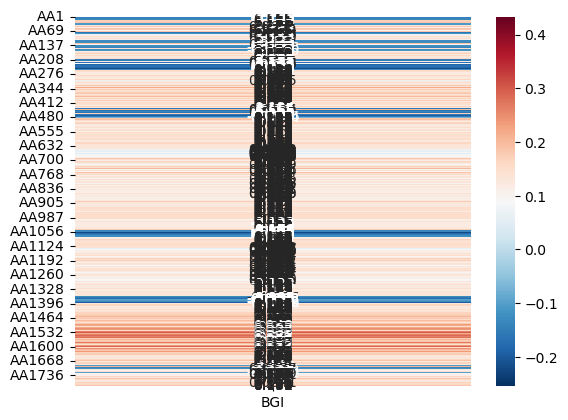

In [20]:
corr_matrix = X_y.corr()
 
# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['BGI']].drop(labels=['BGI'])
 
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

Se seleccionan las que tienen una correlación por arriba de 0.28 y menores a -0.18

In [21]:
vari_impor = []
for i in range(0,len(corr_target)):
    if corr_target["BGI"][i] >0.28 or corr_target["BGI"][i] < -0.18:
        vari_impor.append(corr_target["BGI"][i])

In [22]:
len(vari_impor)

47

### Información mutua
El método de filtro final que veremos es usar información mutua para clasificar y seleccionar las características principales. La información mutua es una medida de dependencia entre dos variables y se puede utilizar para medir cuánto contribuye una característica a la predicción de la variable objetivo. Es similar a la correlación de Pearson, pero no se limita a detectar asociaciones lineales. Esto hace que la información mutua sea útil para modelos más flexibles donde no se asume una forma funcional lineal. Otra ventaja de la información mutua es que también funciona en características o objetivos discretos, a diferencia de la correlación. Aunque, las variables categóricas deben codificarse numéricamente primero.

## SelectBest

Finalmente, echemos un vistazo al uso de la SelectKBest clase de scikit-learnpara ayudar a elegir las kcaracterísticas principales con los puntajes más altos. En nuestro caso, buscamos seleccionar características que compartan la mayor cantidad de información mutua con la variable de destino. Cuando creamos una instancia SelectKBest, especificaremos qué función de puntuación usar y cuántas características principales seleccionar. Aquí, nuestra función de puntuación es mutual_info_regression(), pero como queremos especificar argumentos adicionales además de las entradas Xy y, necesitaremos la ayuda de la partial()función del módulo integrado de Python functools. Luego, el .fit_transform()método devolverá las características filtradas como una matriz numpy:

In [23]:
from sklearn.feature_selection import SelectKBest
from functools import partial
from sklearn.feature_selection import mutual_info_regression

score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)
 
# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=47)
 
print(selection.fit_transform(df, y))

[[0.076923 0.       0.       ... 1.       0.25     0.113636]
 [0.       0.       0.       ... 0.       0.25     0.      ]
 [0.       0.       0.       ... 3.       0.5      0.1     ]
 ...
 [0.       0.       0.       ... 2.       0.       0.657143]
 [0.       0.       0.       ... 1.       0.       0.638889]
 [0.       0.       0.       ... 0.       0.       0.090909]]


In [24]:
kbest = df[df.columns[selection.get_support(indices=True)]]
 
print(kbest)

         AA31  AA104  AA105  AA130  AA132  AA140  AA172  AA173      AA213  \
0    0.076923    0.0    0.0    0.0    0.0    0.0      0      0   0.000000   
1    0.000000    0.0    0.0    0.0    0.0    1.0      0      0  39.556468   
2    0.000000    0.0    0.0    0.0    0.0    0.0      0      0  23.162218   
3    0.000000    0.0    0.0    0.0    0.0    0.0      0      0  38.406571   
4    0.000000    0.0    0.0    0.0    0.0    0.0      0      0  77.305955   
..        ...    ...    ...    ...    ...    ...    ...    ...        ...   
271  0.250000    0.0    0.0    0.0    0.0    0.0      0      0  42.480493   
272  0.333333    3.0    1.5    0.0    0.0    0.0      0      0  12.090349   
273  0.000000    0.0    0.0    0.0    0.0    0.0      0      0   0.000000   
274  0.000000    0.0    0.0    0.0    0.0    0.0      0      0  39.260780   
275  0.000000    0.0    0.0    0.0    0.0    2.0      0      0  38.209446   

        AA427  ...  AA1281  AA1312  AA1367  AA1377    AA1391  AA1392  AA155